In [1]:
#This is a notebook to run a simple binary classification algorithm, using Decision Trees.

#Author: Viviana Acquaviva
#License: BSD but really should be TBD - just be nice.

import pandas as pd
import numpy as np
import sklearn.tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz

#Notes: 

#Data come from here
#from astroML.datasets import fetch_rrlyrae_combined
#X, y = fetch_rrlyrae_combined()

#As I was browsing around, I found some useful examples here:
#https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d
#https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

/usr/local/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
#Let's read in the data in a data frame, and take a look at them

Train = pd.read_csv('RRLTrainSet.csv', index_col = 0)
Test = pd.read_csv('RRLTestSet.csv', index_col = 0)

In [6]:
Train

,g-r,r-i,i-z,u-g,label
0,1.072,0.114,0.127,0.393,0
1,0.995,-0.009,-0.035,0.077,1
2,1.131,0.037,-0.018,0.154,1
3,1.046,0.039,0.019,0.118,1
4,0.880,0.150,0.035,0.321,0
5,1.030,0.178,0.109,0.385,0
6,0.877,0.141,0.050,0.355,0
7,0.877,0.091,0.131,0.250,0
8,1.086,0.033,-0.020,0.153,0
9,0.979,0.153,0.059,0.383,0


In [4]:
Test.head()

,g-r,r-i,i-z,u-g,label
0,1.004,0.140,-0.005,0.376,0
1,0.918,0.137,0.050,0.338,0
2,1.105,-0.004,-0.014,0.055,1
3,1.037,0.137,0.027,0.362,0
4,0.881,0.084,0.073,0.278,0


In [5]:
Test.drop(['label'],axis = 1)

,g-r,r-i,i-z,u-g
0,1.004,0.140,-0.005,0.376
1,0.918,0.137,0.050,0.338
2,1.105,-0.004,-0.014,0.055
3,1.037,0.137,0.027,0.362
4,0.881,0.084,0.073,0.278
5,1.044,0.089,0.006,0.297
6,0.938,0.118,0.024,0.261
7,0.967,0.180,0.130,0.390


In [ ]:
Test

In [7]:
#This builds the four arrays (features/labels x train/test) needed by all sklearn ML models

X_train = Train.drop(['label'], axis=1)
y_train = Train['label']

X_test = Test.drop(['label'], axis=1)
y_test = Test['label']

### First model alert!

This is how we build a model in sklearn. For reproducibility purposes, we will fix the random seed in the Decision Tree. But what is randomized in Decision Trees?


From the docs: The features are always randomly permuted at each split. 
Therefore, the best found split may vary, even with the same training data 
and max_features=n_features, if the improvement of the criterion is identical 
for several splits enumerated during the search of the best split. 
To obtain a deterministic behaviour during fitting, random_state has to be fixed.

In [13]:
#Fill
model = DecisionTreeClassifier(random_state=5)

In [9]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

You might recognize a few familiar attributes up there.

And this is how we fit a model! Fitting a model means that we build the architecture to make decisions.

In [14]:
#Fill
model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

At this point, the model has built a set of questions (splits) that would inform the classification.

This bit below is to visualize the tree.

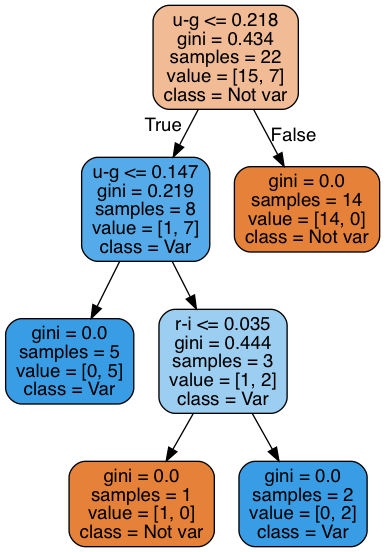

In [15]:
dot_data = StringIO()
export_graphviz(
            model,
            out_file =  dot_data,
            feature_names = list(X_train.columns),
            class_names = ['Not var','Var'],
            filled = True,
rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

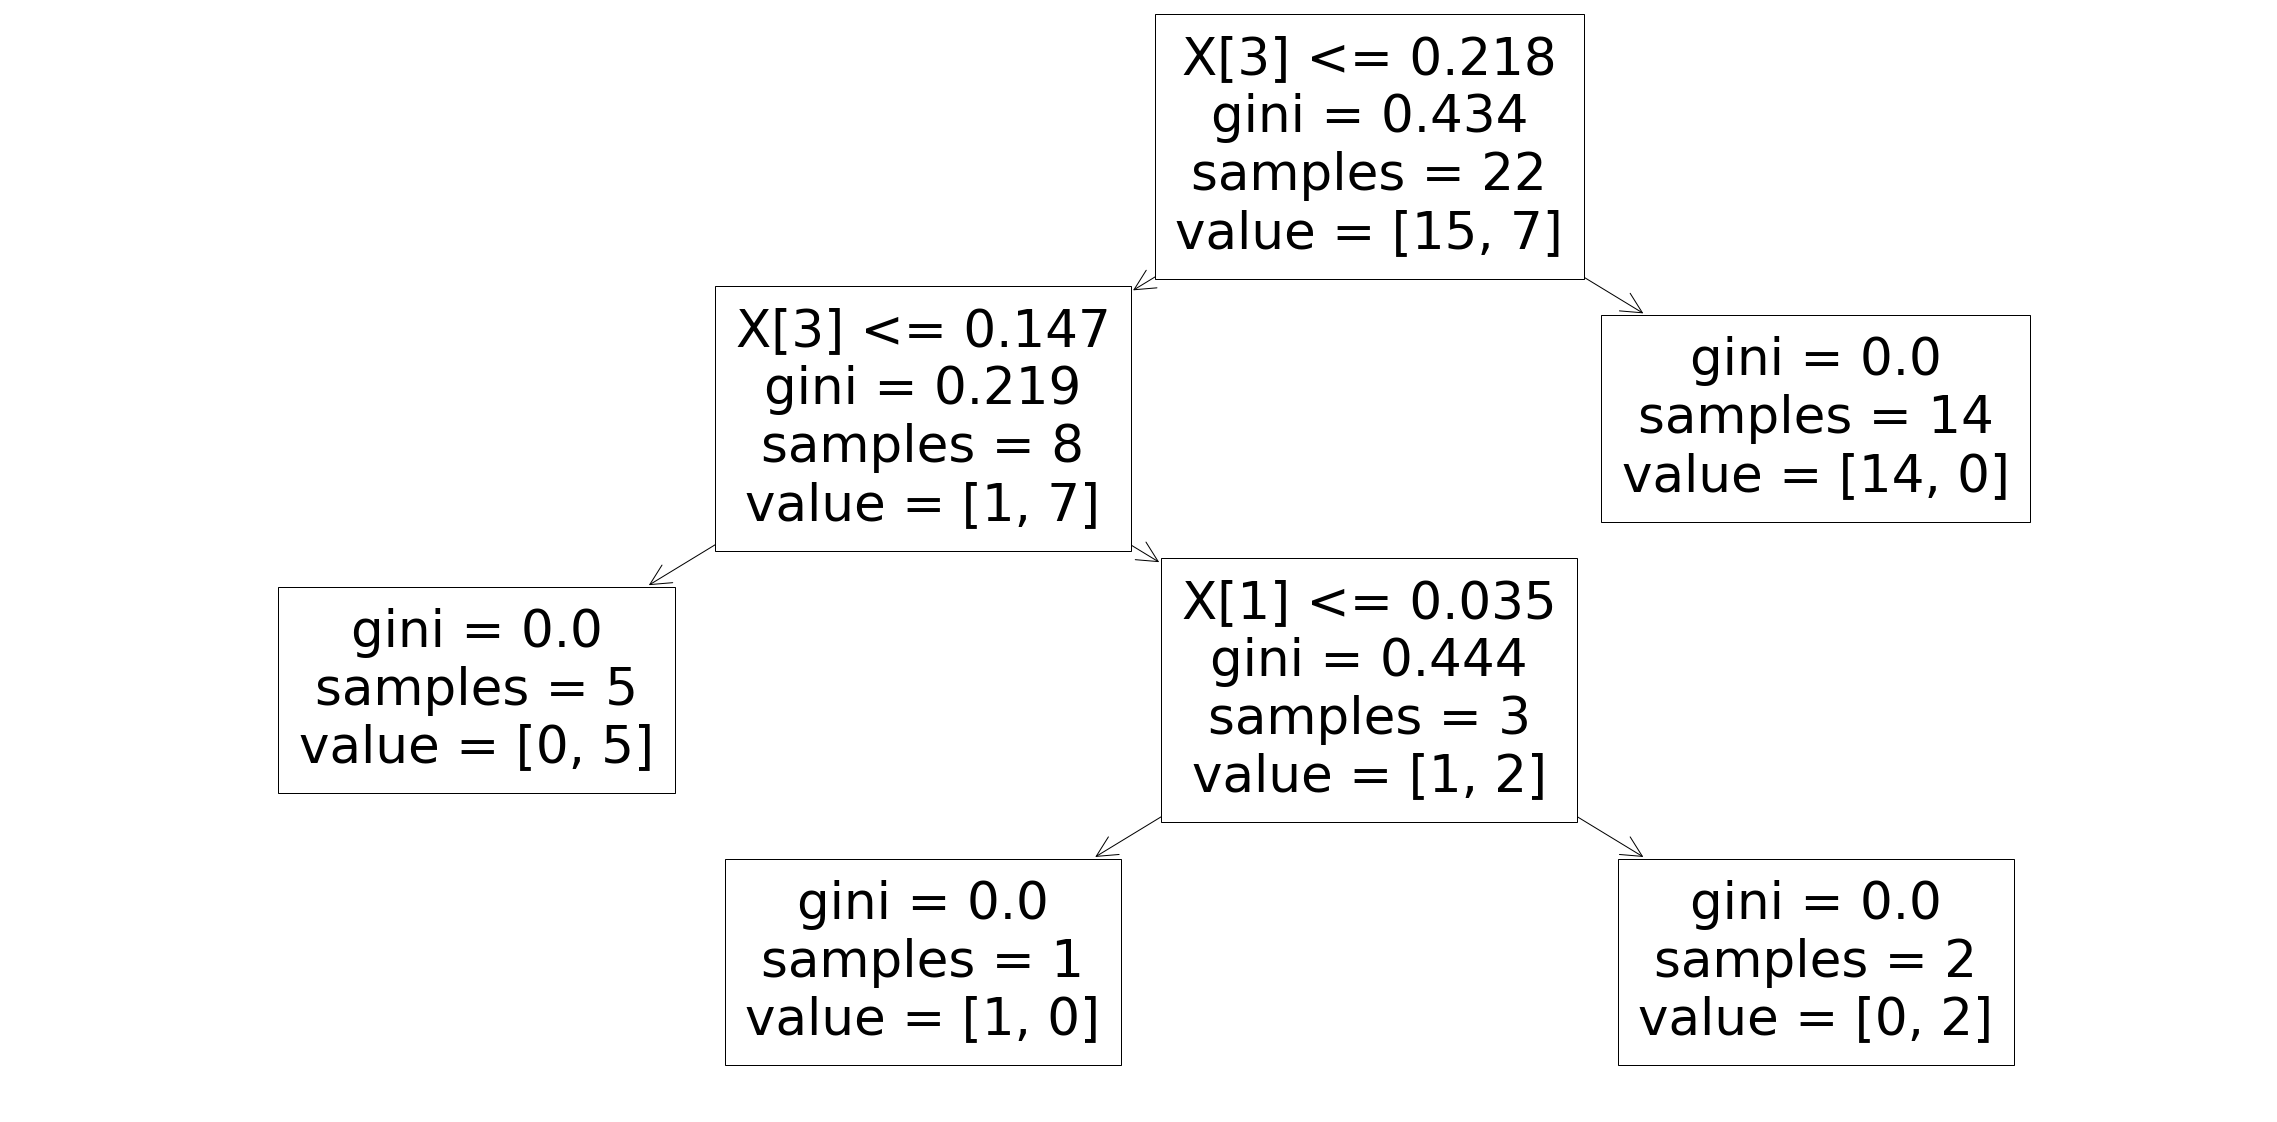

In [18]:
#Alternative method if the above doesn't work

from sklearn import tree
plt.figure(figsize=(40,20))  # customize according to the size of your tree
tree.plot_tree(model);
plt.show()

Questions: 

What is the accuracy score (% of correct classifications) <b> on the training set </b>, based on the tree? 
    
How can we visualize it?

How can we figure out the accuracy <b> on the test set </b>?

In [19]:
#Fill!

#1. 100%

#2

metrics.accuracy_score(y_train, model.predict(X_train))

1.0

In [20]:
#3

metrics.accuracy_score(y_test, model.predict(X_test))

1.0

This cell below shows us the splits made by the decision tree above.

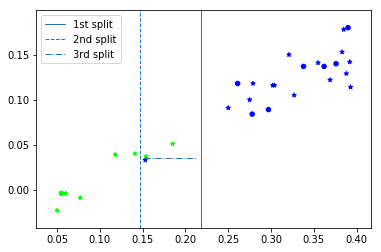

In [21]:
#Fill splits

#Plots training data
plt.scatter(X_train['u-g'], X_train['r-i'], \
            c = y_train, marker = '*', s =20, label = None, cmap = 'brg')
plt.axvline(x= 0.218  , linewidth =1, label = '1st split')
plt.axvline(x= 0.147  , linewidth =1, ls = '--', label = '2nd split')
plt.axhline(y= 0.035  , linewidth =1, ls = '-.', xmin = 0.32, xmax=0.48, label = '3rd split')

#Plots test data
plt.scatter(X_test['u-g'], X_test['r-i'], \
            c = y_test, marker = 'o', s =20, label = None, cmap = 'brg')

plt.legend();